<a href="https://colab.research.google.com/github/sreebitbos/MNST/blob/main/Copy_of_A2_6_MNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml(name='mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X, y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

In [ ]:
X, y = X[:35000], y[:35000]
X.shape, y.shape

((35000, 784), (35000,))

In [ ]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

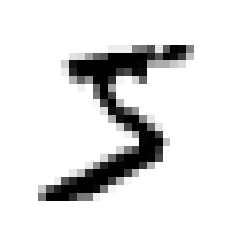

In [ ]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
y[0]

'5'

In [ ]:
y = y.astype(np.int8)

In [ ]:
X_train, y_train, X_test, y_test = X[:30000], y[:30000], X[30000:], y[30000:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30000, 784), (30000,), (5000, 784), (5000,))

In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_clf = SGDClassifier(n_jobs=-1, random_state=42)

In [ ]:
sgd_clf.fit(X=X_train, y=y_train_5)

SGDClassifier(n_jobs=-1, random_state=42)

In [ ]:
sgd_clf.predict(X=[some_digit])

array([ True])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [ ]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

/Users/sreejithmadhavan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [ ]:
for train_index, test_index in skfolds.split(X=X_train, y=y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    num_correct = sum(y_pred == y_test_folds)
    print(num_correct / len(y_pred))

0.9458
0.9634
0.9603


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(estimator=clone(sgd_clf), X=X_train, y=y_train_5, cv=5, scoring="accuracy", n_jobs=-1)
scores

array([0.968     , 0.96      , 0.96433333, 0.96266667, 0.9585    ])

In [ ]:
from sklearn.base import BaseEstimator

In [ ]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros(shape=(len(X), 1), dtype=bool)

In [ ]:
never_5_classifier = Never5Classifier()

In [ ]:
scores = cross_val_score(estimator=never_5_classifier, X=X_train, y=y_train_5, cv=5, scoring="accuracy", n_jobs=-1)
scores

array([0.91433333, 0.911     , 0.91016667, 0.90716667, 0.90583333])

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
y_train_pred = cross_val_predict(estimator=sgd_clf, X=X_train, y=y_train_5, cv=3, n_jobs=-1)

In [ ]:
y_train_pred.shape

(30000,)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_true=y_train_5, y_pred=y_train_pred)

array([[26515,   776],
       [  529,  2180]])

In [ ]:
y_train_perfect_predictions = y_train_5.copy()

In [ ]:
confusion_matrix(y_true=y_train_5, y_pred=y_train_perfect_predictions)

array([[27291,     0],
       [    0,  2709]])

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_true=y_train_5, y_pred=y_train_pred)

0.7374830852503383

In [ ]:
recall_score(y_true=y_train_5, y_pred=y_train_pred)

0.8047249907715024

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_true=y_train_5, y_pred=y_train_pred)

0.7696381288614299

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([11968.30313346])

In [ ]:
threshold = 0

In [ ]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [ ]:
threshold = 8000

In [ ]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [ ]:
y_scores = cross_val_predict(estimator=sgd_clf, X=X_train, y=y_train_5, 
                             cv=3, method='decision_function', n_jobs=-1)

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_true=y_train_5, probas_pred=y_scores)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label='Precision')
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.grid()

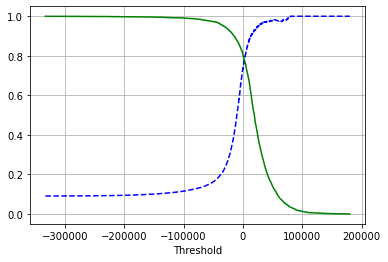

In [ ]:
plot_precision_recall_vs_threshold(precision, recall, thresholds)
plt.show()

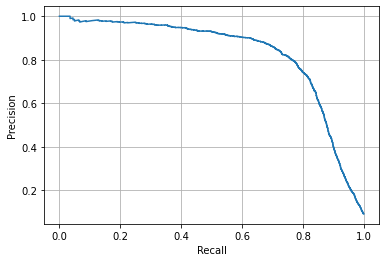

In [ ]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

In [ ]:
threshold_90_precision = thresholds[np.argmax(precision > .9)]
threshold_90_precision

12605.392565725113

In [ ]:
y_train_pred_90 = (y_scores > threshold_90_precision)

In [ ]:
precision = precision_score(y_true=y_train_5, y_pred=y_train_pred_90)
precision

0.9003181336161188

In [ ]:
recall = recall_score(y_train_5, y_train_pred_90)
recall

0.6267995570321152

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_true=y_train_5, y_score=y_scores)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--', label='Random')
    plt.grid()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

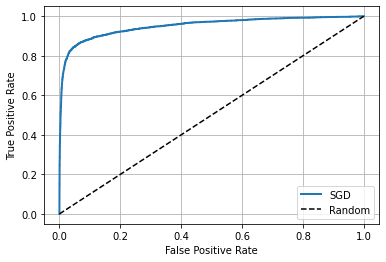

In [ ]:
plot_roc_curve(fpr, tpr, label='SGD')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_train_5, y_scores)

0.9509867800410808

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
y_probas_forest = cross_val_predict(estimator=forest_clf, X=X_train, 
                                    y=y_train_5, cv=5, 
                                    n_jobs=-1, method='predict_proba')

In [ ]:
y_scores_forest = y_probas_forest[:, 1]  # P(X=5)

In [ ]:
fpr_forest, tps_forest, threshs_forest = roc_curve(y_true=y_train_5, y_score=y_scores_forest)

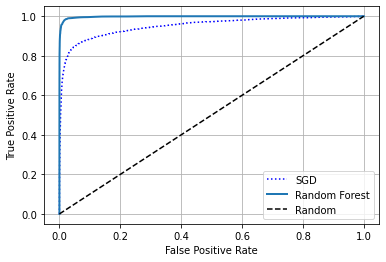

In [ ]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tps_forest, label="Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.998160698309738

In [ ]:
y_preds_forest = cross_val_predict(estimator=forest_clf, X=X_train, 
                                   y=y_train_5, cv=5, 
                                   n_jobs=-1)

In [ ]:
precision_score(y_true=y_train_5, y_pred=y_preds_forest)

0.989659629470056

In [ ]:
recall_score(y_true=y_train_5, y_pred=y_preds_forest)

0.8479143595422666

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svm_clf = LinearSVC()

In [ ]:
X_train.shape, y_train.shape

((30000, 784), (30000,))

In [ ]:
svm_clf.fit(X=X_train, y=y_train)

/Users/sreejithmadhavan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [ ]:
svm_clf.predict([some_digit])

array([3], dtype=int8)

In [ ]:
some_digit_scores = svm_clf.decision_function(X=[some_digit])
some_digit_scores

array([[-3.1292318 , -7.57887431, -2.22651715,  0.12860617, -6.35631824,
        -0.20648218, -7.81413321, -4.11351962, -3.48589272, -3.82556624]])

In [ ]:
np.argmax(some_digit_scores)

3

In [ ]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [ ]:
svm_clf.classes_[np.argmax(some_digit_scores)]

3

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
ovr_clf = OneVsRestClassifier(estimator=LinearSVC(), n_jobs=-1)

In [ ]:
ovr_clf.fit(X=X_train, y=y_train)

OneVsRestClassifier(estimator=LinearSVC(), n_jobs=-1)

In [ ]:
ovr_clf.predict([some_digit])

array([5], dtype=int8)

In [ ]:
len(ovr_clf.estimators_)

10

In [ ]:
sgd_clf = SGDClassifier(n_jobs=-1, random_state=42)

In [ ]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(n_jobs=-1, random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

array([5], dtype=int8)

In [ ]:
sgd_clf.decision_function([some_digit])

array([[ -50458.5075631 , -136486.63842062,  -14135.49961456,
         -10399.0572803 ,  -63068.57630296,   -3043.28005489,
         -64103.92249307,  -68757.6494235 ,  -44670.30230201,
         -27252.81246434]])

In [ ]:
cross_val_score(estimator=sgd_clf, X=X_train, y=y_train, cv=5, scoring='accuracy', n_jobs=-1)

array([0.88366667, 0.864     , 0.86916667, 0.87766667, 0.8725    ])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X=X_train.astype(np.float64))

In [ ]:
cross_val_score(estimator=sgd_clf, X=X_train_scaled, y=y_train, scoring='accuracy', cv=5, n_jobs=-1)

array([0.908     , 0.90266667, 0.89116667, 0.90283333, 0.90733333])

In [ ]:
##Analyze Errors

In [ ]:
y_train_predict = cross_val_predict(estimator=sgd_clf, X=X_train_scaled, y=y_train, cv=5, n_jobs=-1)

In [ ]:
conf_mtrx = confusion_matrix(y_true=y_train, y_pred=y_train_predict)
conf_mtrx

array([[2806,    0,   15,    3,    4,   30,   18,    2,   83,    0],
       [   1, 3252,   24,   13,    3,   28,    2,    3,   91,    6],
       [  14,   18, 2572,   62,   39,   15,   36,   21,  165,    6],
       [  12,   15,   68, 2651,    2,   96,   12,   26,  153,   38],
       [   9,    7,   25,    6, 2622,    4,   20,    8,  129,   96],
       [  15,   12,   18,   80,   41, 2261,   35,    6,  202,   39],
       [  17,    6,   20,    0,   21,   48, 2801,    5,   57,    0],
       [  10,    2,   31,   15,   27,    3,    3, 2821,   59,  136],
       [   6,   34,   21,   53,    2,   59,   21,    3, 2651,   25],
       [  18,   13,   16,   31,   62,   15,    1,   88,  124, 2635]])

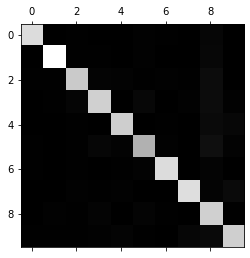

In [ ]:
plt.matshow(A=conf_mtrx, cmap=plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mtrx.sum(axis=1, keepdims=True)

In [ ]:
normed_conf_mtrx = conf_mtrx / row_sums

In [ ]:
np.fill_diagonal(normed_conf_mtrx, val=0)

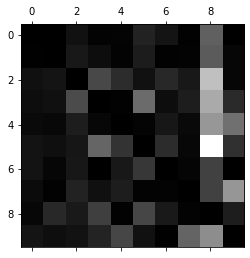

In [ ]:
plt.matshow(A=normed_conf_mtrx, cmap=plt.cm.gray)
plt.show()

In [ ]:
cl_a, cl_b = 3, 5 

In [ ]:
X_aa = X_train[(y_train == cl_a) & (y_train_predict == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_predict == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_predict == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_predict == cl_b)]

In [ ]:
from math import ceil

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    """Plots digits on a grid of rows and columns
    
    # Arguments
        instances: np.ndarray, the digits, where each is a flat array
        images_per_row: int, how many digits to be displayed per row
        options: other arguments for `plt.imshow()`
    """
    size = 28
    n_images = instances.shape[0]
    images_per_row = min(images_per_row, n_images)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = ceil(n_images / images_per_row)
    row_images = list()
    n_empty = (n_rows * images_per_row) - n_images
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row*images_per_row : (row+1)*images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap='binary', **options)
    plt.axis('off')

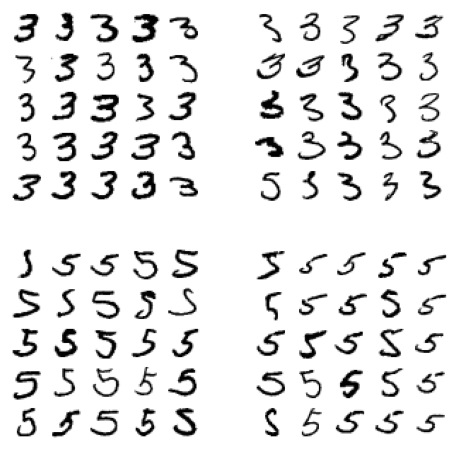

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [ ]:
##Classification -- Multilabel

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)

In [ ]:
y_multilabel = np.c_[y_train_large, y_train_odd]

In [ ]:
knn_clf = KNeighborsClassifier(n_jobs=-1)

In [ ]:
knn_clf.fit(X=X_train, y=y_multilabel)

KNeighborsClassifier(n_jobs=-1)

In [ ]:
knn_clf.predict(X=[some_digit])

array([[False,  True]])

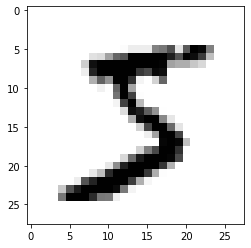

In [ ]:
plt.imshow(some_digit.reshape(28, 28), cmap='binary')

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
y_train_knn_pred = cross_val_predict(estimator=knn_clf, X=X_train, y=y_multilabel, cv=5, n_jobs=-1)

In [ ]:
score = f1_score(y_multilabel, y_train_knn_pred, average="macro")
score

0.9720267778020544

In [ ]:
##Classification -- Multi output

In [ ]:
noise = np.random.randint(low=0, high=100, size=(X_train.shape[0], 784))

In [ ]:
X_train_mod = X_train + noise
X_train_mod.shape

(30000, 784)

In [ ]:
noise = np.random.randint(low=0, high=100, size=(X_test.shape[0], 784))

In [ ]:
X_test_mod = X_test + noise
X_test_mod.shape

(5000, 784)

In [ ]:
y_train_mod = X_train.copy()
y_test_mod = X_test.copy()

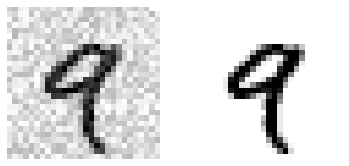

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(X_train_mod[4:5].reshape(28, 28), cmap='binary'); ax[0].axis('off')
ax[1].imshow(y_train_mod[4:5].reshape(28, 28), cmap='binary'); ax[1].axis('off')
plt.show()

In [ ]:
knn_clf.fit(X=X_train_mod, y=y_train_mod)

KNeighborsClassifier(n_jobs=-1)

In [ ]:
clean_digit = knn_clf.predict(X=[X_test_mod[234]]).reshape(28, 28)

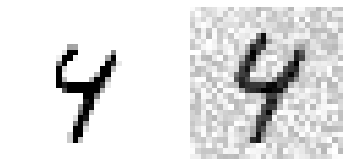

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(clean_digit, cmap='binary'); ax[0].axis('off')
ax[1].imshow(X_test_mod[234].reshape(28, 28), cmap='binary'); ax[1].axis('off')
plt.show()

In [ ]:
## Building a classifier for the MNIST dataset that achieves over 97% accuracy over the test set.

In [ ]:
## Classifier to be used : KNeighbors classifier 
## Good hyperparameter values: Use grid search on weights and n_neighbors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style()

In [ ]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn==0.23.2

In [1]:
import sklearn
print('scikit-learn version: {}.'.format(sklearn.__version__))


scikit-learn version: 0.23.2.


In [2]:
from sklearn.datasets import openml

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.openml module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
mnist = openml.fetch_openml(name='mnist_784', version=1)

In [4]:
X, y = mnist.data, mnist.target
X.shape, y.shape

((70000, 784), (70000,))

In [5]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
knn_clf = KNeighborsClassifier(n_jobs=-1)

In [8]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(estimator=knn_clf, X=X_train, y=y_train, scoring='accuracy', cv=5, n_jobs=-1)

In [ ]:
scores

array([0.96975   , 0.97016667, 0.96933333, 0.96816667, 0.969     ])

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': [3, 4, 5]
}

In [ ]:
grid_search_clf = GridSearchCV(estimator=knn_clf, param_grid=grid, scoring='accuracy', cv=5, verbose=3, n_jobs=-1)

In [ ]:
grid_search_clf.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
grid_search_clf.best_score_

In [ ]:
grid_search_clf.best_params_

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-1)

In [ ]:
knn_classifier.fit(X=X_train, y=y_train)

In [ ]:
knn_classifier.score(X=X_test, y=y_test)

In [ ]:
from joblib import dump

In [ ]:
dump(knn_classifier, 'knn_MNIST_97.joblib')

In [ ]:
## Function that can shift an MNIST image in any direction

In [ ]:
from scipy.ndimage.interpolation import shift
from sklearn.metrics import accuracy_score

In [ ]:
def shift_digit(imgs, direction):
    """Shifts image by 1 pixel in any direction
    
    # Arguments
        imgs: np.ndarray, contains flattened digit images
        direction: string, direction you want to shift the pixels in. \in {'left', 'right', 'up', 'down'}
    
    # Returns
        shifted: np.ndarray, the resulting shifted image
    """
    dir_to_shift = {
        'up': [0, -1, 0],
        'down': [0, 1, 0],
        'left': [0, 0, -1],
        'right': [0, 0, 1]
    }
    return shift(imgs.reshape(-1, 28, 28), shift=dir_to_shift[direction], cval=0).reshape(-1, 28*28)

In [ ]:
up_shifted_X_train = shift_digit(X_train, 'up')
down_shifted_X_train = shift_digit(X_train, 'down')
left_shifted_X_train = shift_digit(X_train, 'left')
right_shifted_X_train = shift_digit(X_train, 'right')

In [ ]:
aug_X_train = np.concatenate((up_shifted_X_train, down_shifted_X_train, left_shifted_X_train, right_shifted_X_train), axis=0)
aug_X_train.shape

In [ ]:
aug_y_train = np.concatenate((y_train, y_train, y_train, y_train), axis=0)
aug_y_train.shape

In [ ]:
import random

In [ ]:
def shuffle_X_y(X, y):
    """Shuffles two arrays using indexes
    
    # Arguments
        X: np.ndarray, input
        y: np.ndarray, output
    
    # Returns
        shuffled_X: np.ndarray
        shuffled_y: np.ndarray
    """
    indices = list(range(X.shape[0]))
    random.shuffle(indices)
    return X[indices], y[indices]

In [ ]:
X_train.shape, aug_X_train.shape, y_train.shape, aug_y_train.shape

In [ ]:
X_train = np.concatenate((X_train, aug_X_train), axis=0)
y_train = np.concatenate((y_train, aug_y_train), axis=0)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_train, y_train = shuffle_X_y(X_train, y_train)

In [ ]:
plt.imshow(X_train[99].reshape(28,28), cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
y_train[99]

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-1)

In [ ]:
knn_classifier.fit(X=X_train, y=y_train)

In [ ]:
y_hat = knn_classifier.predict(X=X_test)
accuracy_score(y_true=y_test, y_pred=y_hat)